In [50]:
# #word2vec imports
# from gensim.models import Word2Vec

# #hyperbolic imports
# import torch
# import tensorflow as tf
# # from tensorflow import keras

# from numpy.linalg import norm
# from sklearn.metrics import pairwise_distances
# from scipy.spatial.distance import cdist

# # sparQL imports
# from SPARQLWrapper import SPARQLWrapper, JSON

# # ML imports
# import keras
# from keras.models import Model
# from keras.layers import *    
# from keras import backend as K
# from keras.callbacks import EarlyStopping

# # from tensorflow import keras

# # Confusion Matrix imports
# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import pairwise_distances
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# #utility imports
# import os
# import warnings
# import random
# import itertools
# from operator import itemgetter
# from collections import Counter
# from IPython.display import clear_output
# import time

# #data analysis imports
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import silhouette_score
# from sklearn.decomposition import PCA
# import matplotlib.patches as mpatches
# from collections import Counter
# import pandas as pd
# import seaborn as sns
# import time
# from scipy import stats


# # FUNCTIONS
# from mixed_regression_functions import *

# # warnings.filterwarnings('ignore')
# # os.environ["CUDA_VISIBLE_DEVICES"] = "-1"


In [1]:
import pickle

def save_data_with_pickle(relative_path, data):
    """ Save data using pickle (serialize) """

    with open(relative_path, 'wb') as handle:
        pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)
        
def load_data_with_pickle(relative_path):
    """ Load data using pickle (deserialize) """

    with open(relative_path, 'rb') as handle:
        return pickle.load(handle)

In [2]:
import numpy as np


def import_stanford_hyperbolic(PATH):
    dic = load_data_with_pickle('./dic')
    inv_dic = load_data_with_pickle('./inv_dic')
    with open(PATH, 'r') as inp:
        lines = inp.readlines()
        lines = lines[1:]
        lines = [l.replace('\n','') for l in lines]
        tau = float(lines[0].split(',')[-1])
        stanford_emb = {inv_dic[l.split(',')[0]]: np.array(l.split(',')[1:-1]).astype('float64') for l in lines}
    return stanford_emb, tau

In [3]:
# PATH
HYPERBOLIC_EMBEDDING_PATH = "/datahdd/vmanuel/hyperbolic_embedding_algorithms/HyperE-Stanford/hyperbolics/dbpedia.r2.emb"
TYPE_EMBEDDING_PATH = "/datahdd/vmanuel/datasets/t2v.bin"

In [4]:
from gensim.models import Word2Vec

hyperbolic_embedding = import_stanford_hyperbolic(HYPERBOLIC_EMBEDDING_PATH)[0]
type_embedding = Word2Vec.load(TYPE_EMBEDDING_PATH)

## Import datas

In [5]:
PATH_TO_DATA_FOLDER = '/datahdd/vmanuel/datasets/elmo_layer_1/17_classes/'

X_train = load_data_with_pickle(PATH_TO_DATA_FOLDER + 'X_train')
Y_train = load_data_with_pickle(PATH_TO_DATA_FOLDER + 'Y_train')
word_train = load_data_with_pickle(PATH_TO_DATA_FOLDER + 'word_train')
X_test = load_data_with_pickle(PATH_TO_DATA_FOLDER + 'X_test')
Y_test = load_data_with_pickle(PATH_TO_DATA_FOLDER + 'Y_test')
word_test = load_data_with_pickle(PATH_TO_DATA_FOLDER + 'word_test')
X_val = load_data_with_pickle(PATH_TO_DATA_FOLDER + 'X_val')
Y_val = load_data_with_pickle(PATH_TO_DATA_FOLDER + 'Y_val')
word_val = load_data_with_pickle(PATH_TO_DATA_FOLDER + 'word_val')

In [6]:
len(X_test) + len(X_train) + len(X_val)

151112

In [7]:
from collections import Counter

Tr = Counter(Y_train).most_common()
Te = Counter(Y_test).most_common()
Va = Counter(Y_val).most_common()

print('{:^30}|{:^30}|{:^30}'.format('Train','Val', 'Test'))
print('{:-^30}|{:-^30}|{:-^30}'.format('', '', ''))

for x, y, z in zip(Tr, Te, Va):
    print('{:^25}{:^5}|{:^25}{:^5}|{:^25}{:^5}'.format(x[0], x[1], y[0], y[1], z[0], z[1]))

            Train             |             Val              |             Test             
------------------------------|------------------------------|------------------------------
         Company         36820|        Language         3195 |          Plant          1685 
        Language         16506|         Company         2453 |         Company         1598 
          Plant          14655|         Mammal          1602 |         Mammal          1565 
         Colour          8331 |          Plant          1128 |        Language         1523 
         Mammal          8303 |   FictionalCharacter     913 |          Sport          1486 
   FictionalCharacter    8188 |       EthnicGroup        882 |   FictionalCharacter     797 
       EthnicGroup       6626 |         Colour           631 |       EthnicGroup        784 
 ArchitecturalStructure  6186 | ArchitecturalStructure   599 | ArchitecturalStructure   557 
         Planet          4245 |         Weapon           402 |        

### Dataset Creation

In [8]:
y_t2v_train = []
y_t2v_test = []
y_hyp_train = []
y_hyp_test = []
y_t2v_val = []
y_hyp_val = []
not_present = []

for label in Y_train:
    try:
        y_t2v_train.append(type_embedding.wv[label])
        y_hyp_train.append(hyperbolic_embedding[label])
#     y_hyp_train.append(scaled_hyperbolic_embedding[label][0])
    except:
        if label not in not_present:
            not_present.append(label)

            
for label in Y_val:
    try:
        y_t2v_val.append(type_embedding.wv[label])
        y_hyp_val.append(hyperbolic_embedding[label])
    except:
        if label not in not_present:
            not_present.append(label)

for label in Y_test:
    try:
        y_t2v_test.append(type_embedding.wv[label])
        y_hyp_test.append(hyperbolic_embedding[label])
#     y_hyp_train.append(scaled_hyperbolic_embedding[label][0])
    except:
        if label not in not_present:
            not_present.append(label)

y_t2v_val = np.array(y_t2v_val)
y_t2v_test = np.array(y_t2v_test)
y_t2v_train = np.array(y_t2v_train)
y_hyp_val = np.array(y_hyp_val)
y_hyp_test = np.array(y_hyp_test)
y_hyp_train = np.array(y_hyp_train)

In [9]:
not_present

[]

## Define the Network

In [10]:
from keras.layers import *    

def make_network(input_dimension = 0, mixed_dimension = 100):
    if input_dimension == 0:
        input_dimension = word_embedding.wv.vector_size
    type_embedding_dimension = type_embedding.wv.vector_size
    hyper_embedding_dimension = 2
    
    inp = Input(shape=(input_dimension, ))
    mixed = Dense(int(mixed_dimension * 2), activation = "tanh")(inp)
    droppy = Dropout(rate=0.3)(mixed)
    mixed = Dense(mixed_dimension, activation = "tanh")(droppy)
    droppy = Dropout(rate=0.3)(mixed)
    mixed = Dense(int(mixed_dimension/2), activation = "tanh")(mixed)
    droppy = Dropout(rate=0.3)(mixed)

    hyperbolic_embedding_layer = Dense(hyper_embedding_dimension, name='Hyper')(mixed)

    type_embedding_layer = Dense(type_embedding_dimension, name='T2V')(mixed)
    
    return inp, mixed, hyperbolic_embedding_layer, type_embedding_layer

Using TensorFlow backend.


### Define the hyperbolic loss, the one in the paper

In [11]:
def hyperbolic_loss(y_true, y_pred):

        num = 2  *  tf.norm(y_true - y_pred, axis = 1)
        n = tf.norm(y_pred, axis = 1)**2
        densx = (1 - n)
        dendx = (1 - tf.norm(y_true, axis = 1)**2)
        
        densx = tf.clip_by_value(densx,
                                   clip_value_min=1e-18,
                                   clip_value_max=1)
        dendx = tf.clip_by_value(dendx,
                                   clip_value_min=1e-15,
                                   clip_value_max=1)
        
        denom = densx * dendx

        
        frac = num/denom
        acos = tf.math.acosh(1  + frac)

        intern_circle_distance = tf.norm(y_pred) - 0.8
        
        ret = tf.where(tf.logical_and(intern_circle_distance > 0,
                                      intern_circle_distance < 0.2),
                        acos,
                        acos*4)        
        return tf.reduce_mean(ret)
        

### Define the cosine loss with weight

In [12]:
def cosine_loss(y_true, y_pred):
    return keras.losses.cosine_proximity(y_true=y_true, y_pred=y_pred) * 10

## Train the Model

In [13]:
import keras
import tensorflow as tf

from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import Model



inp, mixed, hyperbolic_embedding_layer, type_embedding_layer = make_network(1024, 256)

early_stop = EarlyStopping(monitor='val_loss', patience = 20, restore_best_weights=True)

opt = Adam(lr = 0.0001)

mixed_model = Model(input=inp, output=[type_embedding_layer, hyperbolic_embedding_layer])
mixed_model.compile(optimizer=opt, loss=[cosine_loss, hyperbolic_loss])
mixed_history = mixed_model.fit(X_train
                                , [y_t2v_train, y_hyp_train] 
                                , epochs = 200
                                , batch_size = 2048
                                , validation_data = (X_val, [y_t2v_val, y_hyp_val])
                                , shuffle = True
                                , callbacks = [early_stop]
               )

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


/home/vmanuel/venv/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=[<tf.Tenso...)`
  app.launch_new_instance()


Train on 126607 samples, validate on 11469 samples
Epoch 1/200
126607/126607 [==============================] - 3s 21us/step - loss: 55.7640 - T2V_loss: -0.7026 - Hyper_loss: 56.4666 - val_loss: 42.1282 - val_T2V_loss: -1.9358 - val_Hyper_loss: 44.0640
Epoch 2/200
126607/126607 [==============================] - 2s 17us/step - loss: 41.5219 - T2V_loss: -2.9201 - Hyper_loss: 44.4420 - val_loss: 39.5925 - val_T2V_loss: -3.5721 - val_Hyper_loss: 43.1646
Epoch 3/200
126607/126607 [==============================] - 2s 16us/step - loss: 37.9810 - T2V_loss: -4.3079 - Hyper_loss: 42.2890 - val_loss: 38.7015 - val_T2V_loss: -4.1551 - val_Hyper_loss: 42.8567
Epoch 4/200
126607/126607 [==============================] - 3s 20us/step - loss: 36.8443 - T2V_loss: -4.9354 - Hyper_loss: 41.7797 - val_loss: 38.3346 - val_T2V_loss: -4.3920 - val_Hyper_loss: 42.7266
Epoch 5/200
126607/126607 [==============================] - 2s 17us/step - loss: 36.4783 - T2V_loss: -5.3074 - Hyper_loss: 41.7857 - val_los

### Plot losses

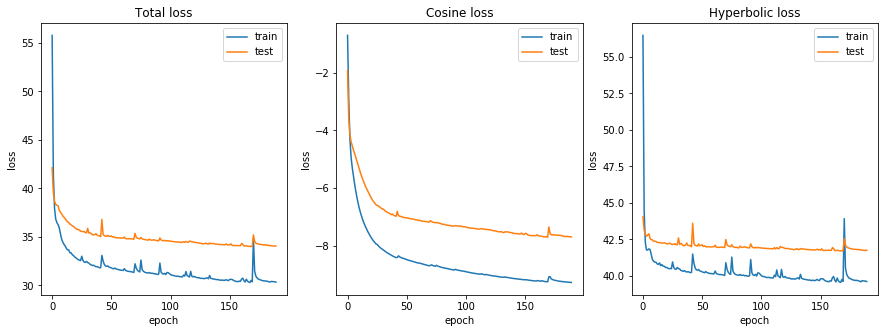

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))

plt.subplot(131)
plt.plot(mixed_history.history['loss'])
plt.plot(mixed_history.history['val_loss'])
plt.title('Total loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.subplot(132)
plt.plot(mixed_history.history['T2V_loss'])
plt.plot(mixed_history.history['val_T2V_loss'])
plt.title('Cosine loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.subplot(133)
plt.plot(mixed_history.history['Hyper_loss'])
plt.plot(mixed_history.history['val_Hyper_loss'])
plt.title('Hyperbolic loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.show()

## Plot predictions

In [16]:
import matplotlib.cm as cm
import matplotlib.patches as mpatches

classes = list(set(Y_val))
colors = cm.tab20(np.linspace(0, 1, len(classes)))
color_map = {cla: col for cla,col in zip(classes, colors)}

patchList = []

for key in classes:
    data_key = mpatches.Patch(color=color_map[key], label=key)
    patchList.append(data_key)

100%


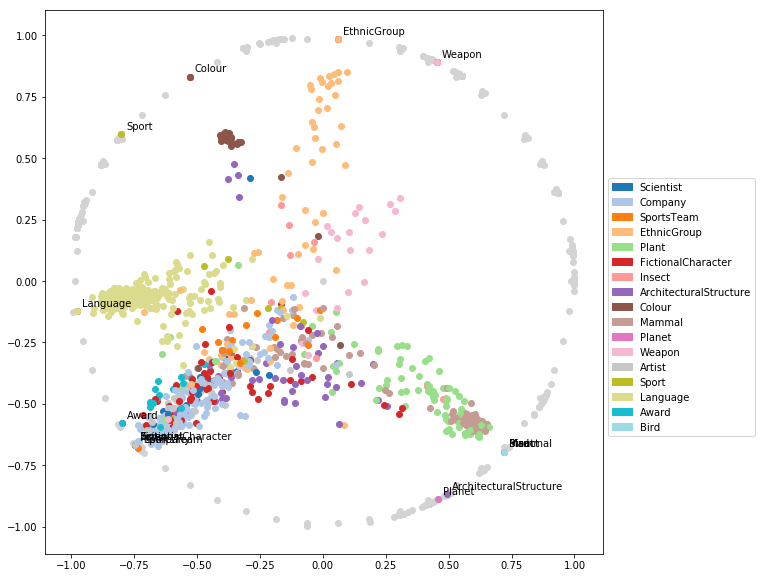

In [17]:
from IPython.display import clear_output

plt.figure(figsize=(10,10))

for l, p in hyperbolic_embedding.items():
    plt.scatter(p[0], p[1], c = '#d3d3d3')
    if l in classes:
        plt.scatter(p[0], p[1], c = 'r')
        plt.text(p[0] + 0.02, p[1] + 0.02, l)

class_plot = [hyperbolic_embedding[c] for c in classes]
        
for i, c in enumerate(class_plot):
    plt.scatter(c[0], c[1], color = color_map[classes[i]])

plt.legend(handles=patchList, bbox_to_anchor=(1, 0.7))

n = 1000

pred = mixed_model.predict(X_test[:n])[1]

mms = 0
fhs = 0
min_p = 0
for i, c in enumerate(pred):
    plt.scatter(c[0], c[1], color = color_map[Y_test[i]])
    
    div = round(i/n , 2)
    
    if div != min_p:
        min_p = div
        clear_output()
        print('{}%'.format(int(min_p * 100)))
        


In [18]:
from mixed_regression_functions import midpoint

pred = mixed_model.predict(X_test)[1]

centroids = {c:[] for c in classes}

pred_dict = {c:[] for c in classes}
for i, p in enumerate(pred):
#     if norm(p) < 1:
        pred_dict[Y_test[i]].append(p)

for c in classes:
    centroids[c] = midpoint(pred_dict[c])

In [19]:
leyend = []

data_key = mpatches.Patch(color='b', label='real')
leyend.append(data_key)

data_key = mpatches.Patch(color='r', label='imputed')
leyend.append(data_key)


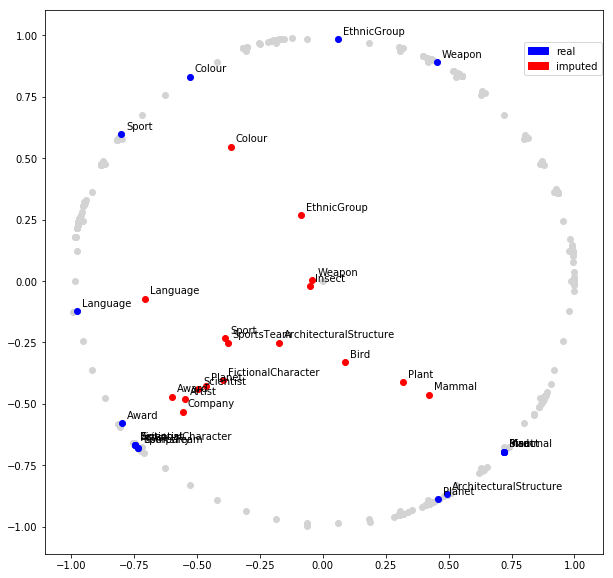

In [20]:
plt.figure(figsize=(10,10))

for l, p in zip(hyperbolic_embedding.keys(), hyperbolic_embedding.values()):
    plt.scatter(p[0], p[1], c = '#d3d3d3')
    if l in classes:
#         plt.scatter(p[0], p[1], c = color_map[l])
        plt.text(p[0] + 0.02, p[1] + 0.02, l)

class_plot = [hyperbolic_embedding[c] for c in classes]
        
for i, c in enumerate(class_plot):
    plt.scatter(c[0], c[1], color = 'b')

for k,v in zip(centroids.keys(), centroids.values()):
    if not np.isnan(v[0]):
        plt.scatter(v[0], v[1], color = 'r')
        plt.text(v[0] + 0.02, v[1] + 0.02, k)

plt.legend(handles=leyend, bbox_to_anchor=(0.85, 0.95))


# for k,v in zip(centroids['rfr'].keys(), centroids['rfr'].values()):
#     if not np.isnan(v[0]):
#         plt.scatter(v[0], v[1], color = 'g')
#         plt.text(v[0] + 0.02, v[1] + 0.02, k)
        

# for k,v in zip(centroids['single'].keys(), centroids['single'].values()):
#     if not np.isnan(v[0]):
#         plt.scatter(v[0], v[1], color = 'k')
#         plt.text(v[0] + 0.02, v[1] + 0.02, k)


## Random Forest Regressor

In [21]:
from sklearn.ensemble import RandomForestRegressor

### Random Forest training

In [22]:
import time

t = time.time()
dis_regr = RandomForestRegressor(max_depth=8, 
                                 random_state=0,
                                 n_estimators=15,
                                 n_jobs = 5)
dis_regr.fit(X_train[:10000], y_t2v_train[:10000])
time.time() - t

61.80538558959961

In [23]:
t = time.time()
hyp_regr = RandomForestRegressor(max_depth=8, 
                                 random_state=0,
#                                  criterion=hyperbolic_loss,
                                 n_estimators=15,
                                 n_jobs = 5)
hyp_regr.fit(X_train[:10000], y_hyp_train[:10000])
time.time()-t

16.559566736221313

### Preliminar Evaluation

In [25]:
from mixed_regression_functions import hyper_distance

preds = hyp_regr.predict(X_test)

class_dists = {c:[] for c in classes}
class_points = {c:[] for c in classes}

for i, p in enumerate(preds):
    d = hyper_distance(p, hyperbolic_embedding[Y_test[i]])
    class_dists[Y_test[i]].append(d)
    class_points[Y_test[i]].append(p)
    
centroids = {}
for c in classes:
    centroids[c] = midpoint(class_points[c])
#     euclids[c] = np.sum(np.array(class_points[c])/len(class_points[c]), axis=0)



In [26]:
for k, v in class_dists.items():
    print('mean hyper distance for {}: {}'.format(k, round(np.mean(v), 4)))

for k, v in centroids.items():
    print('centroid hyper distance for {}: {}'.format(k, round(hyper_distance(v, 
                                                                              hyperbolic_embedding[k], 
                                                                              1)
                                                               , 4)))

mean hyper distance for Scientist: 10.0322
mean hyper distance for Company: 10.6464
mean hyper distance for SportsTeam: 11.2977
mean hyper distance for EthnicGroup: 5.6407
mean hyper distance for Plant: 13.3513
mean hyper distance for FictionalCharacter: 12.329
mean hyper distance for Insect: 18.5912
mean hyper distance for ArchitecturalStructure: 6.9802
mean hyper distance for Colour: 3.2161
mean hyper distance for Mammal: 16.8054
mean hyper distance for Planet: 13.2999
mean hyper distance for Weapon: 9.3309
mean hyper distance for Artist: 9.7883
mean hyper distance for Sport: 9.7897
mean hyper distance for Language: 4.3374
mean hyper distance for Award: 3.1342
mean hyper distance for Bird: 17.8763
centroid hyper distance for Scientist: 10.0343
centroid hyper distance for Company: 10.6258
centroid hyper distance for SportsTeam: 11.2916
centroid hyper distance for EthnicGroup: 5.5063
centroid hyper distance for Plant: 13.2506
centroid hyper distance for FictionalCharacter: 12.3477
cent

### Simple Network

In [27]:

inp = Input(shape=(1024, ))

mixed = Dense(256, activation = "tanh")(inp)
droppy = Dropout(0.3)(mixed)
mixed = Dense(128, activation = "tanh")(droppy)
droppy = Dropout(0.3)(mixed)
mixed = Dense(128, activation = "tanh")(droppy)
droppy = Dropout(0.3)(mixed)
mixed = Dense(64, activation = "tanh")(droppy)

hyperbolic_embedding_layer = Dense(2, name='Hyper')(mixed)
dis_embedding_layer = Dense(100, name='Hyper')(mixed)


early_stop = EarlyStopping(monitor='val_loss', patience = 20, restore_best_weights=True)

single_hyp_model = Model(input=inp, output=hyperbolic_embedding_layer)


single_hyp_model.compile(optimizer='adam', loss=hyperbolic_loss)

single_hyp_history = single_hyp_model.fit(X_train
                                , y_hyp_train 
                                , epochs = 200
                                , batch_size = 512
                                , validation_data=(X_val, y_hyp_val)
                                , shuffle = True
                                , callbacks = [early_stop]
               )

/home/vmanuel/venv/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("Hy...)`


Train on 126607 samples, validate on 11469 samples
Epoch 1/200
126607/126607 [==============================] - 4s 30us/step - loss: 46.2561 - val_loss: 42.5759
Epoch 2/200
126607/126607 [==============================] - 3s 23us/step - loss: 41.4818 - val_loss: 42.3844
Epoch 3/200
126607/126607 [==============================] - 3s 23us/step - loss: 41.6992 - val_loss: 42.3591
Epoch 4/200
126607/126607 [==============================] - 3s 24us/step - loss: 43.8285 - val_loss: 42.7425
Epoch 5/200
126607/126607 [==============================] - 3s 23us/step - loss: 41.4260 - val_loss: 42.5518
Epoch 6/200
126607/126607 [==============================] - 3s 23us/step - loss: 41.1254 - val_loss: 42.6519
Epoch 7/200
126607/126607 [==============================] - 3s 24us/step - loss: 40.9379 - val_loss: 42.3451
Epoch 8/200
126607/126607 [==============================] - 3s 23us/step - loss: 40.8590 - val_loss: 42.3026
Epoch 9/200
126607/126607 [==============================] - 3s 23us/

In [28]:
inp = Input(shape=(1024, ))

mixed = Dense(256, activation = "tanh")(inp)
droppy = Dropout(0.3)(mixed)
mixed = Dense(128, activation = "tanh")(droppy)
droppy = Dropout(0.3)(mixed)
mixed = Dense(128, activation = "tanh")(droppy)
droppy = Dropout(0.3)(mixed)
mixed = Dense(128, activation = "tanh")(droppy)

hyperbolic_embedding_layer = Dense(2, name='Hyper')(mixed)
dis_embedding_layer = Dense(100, name='Hyper')(mixed)


early_stop = EarlyStopping(monitor='val_loss', patience = 20, restore_best_weights=True)



single_dis_model = Model(input=inp, output=dis_embedding_layer)
single_dis_model.compile(optimizer='adam', loss=cosine_loss)
single_dis_history = single_dis_model.fit(X_train
                                , y_t2v_train
                                , epochs = 200
                                , batch_size = 1024
                                , validation_data=(X_val, y_t2v_val)
                                , shuffle = True
                                , callbacks = [early_stop])

/home/vmanuel/venv/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("Hy...)`


Train on 126607 samples, validate on 11469 samples
Epoch 1/200
126607/126607 [==============================] - 3s 23us/step - loss: -7.3204 - val_loss: -7.2597
Epoch 2/200
126607/126607 [==============================] - 2s 20us/step - loss: -8.9068 - val_loss: -7.5628
Epoch 3/200
126607/126607 [==============================] - 2s 18us/step - loss: -9.1927 - val_loss: -7.6417
Epoch 4/200
126607/126607 [==============================] - 2s 17us/step - loss: -9.3417 - val_loss: -7.8110
Epoch 5/200
126607/126607 [==============================] - 2s 17us/step - loss: -9.4216 - val_loss: -7.8062
Epoch 6/200
126607/126607 [==============================] - 2s 18us/step - loss: -9.4842 - val_loss: -7.8744
Epoch 7/200
126607/126607 [==============================] - 2s 17us/step - loss: -9.5280 - val_loss: -7.8647
Epoch 8/200
126607/126607 [==============================] - 2s 17us/step - loss: -9.5599 - val_loss: -7.8822
Epoch 9/200
126607/126607 [==============================] - 2s 17us/

In [29]:
from sklearn.metrics import mean_squared_error
from mixed_regression_functions import find_neighbours



def print_res(X_test, Y_test, double, single, rfr, mode, measure, t = 'no'):
    single_pred = single.predict(X_test)
    rfr_pred = rfr.predict(X_test)
    
    if mode == 'hyper':
        try:
            title = 'Hyperbolic '
            double_pred = double.predict(X_test)[1]
        except:
            double_pred = double.predict(encoded_test)[1]
    else:
        try:
            title = 'Rank of Distributional '
            double_pred = double.predict(X_test)[0]
        except:
            double_pred = double.predict(encoded_test)[0]
    
            
    
    if measure == 'centroid':
        title += 'centroid predictions'
    elif measure == 'mean':
        title += 'mean distance'
    
    print('-----------------------------------------------------------------------------------------------------------')
    print('{:^105}'.format(title))
    print('-----------------------------------------------------------------------------------------------------------')    
    print('{:^33}|{:^24}|{:^24}|{:^24}'.format('Class', 'RFR', 'Single', 'Double'))
    print('{:-^33}|{:-^24}|{:-^24}|{:-^24}'.format('', '', '', ''))
    if t != 'quantile':
        ret_dic = distances(Y_test, rfr_pred, single_pred, double_pred, mode, measure)
    else:
        ret_dic = quantiles(Y_test, rfr_pred, single_pred, double_pred, mode, measure)
    for c in ret_dic['rfr'].keys():
        print('{:^33}|{:^24.4f}|{:^24.4f}|{:^24.4f}'.format(c, ret_dic['rfr'][c], ret_dic['single'][c], ret_dic['double'][c])) 
    print('-----------------------------------------------------------------------------------------------------------')
    print('{:^33}|{:^24.4f}|{:^24.4f}|{:^24.4f}'.format('global {} distance : '.format(measure), 
                                                        ret_dic['tot']['rfr'],
                                                        ret_dic['tot']['single'],
                                                        ret_dic['tot']['double']
                                                       ))

def distances(Y_test, rfr_pred,  single_pred, double_pred, mode, measure):
    models = ['rfr', 'single', 'double']
    cs = set(Y_test)
    
    class_dists = {r: {} for r in models}
    class_dists['rfr'] = {c:[] for c in cs}
    class_dists['single'] = {c:[] for c in cs}
    class_dists['double'] = {c:[] for c in cs}
    
    class_points = {r: {} for r in models}
    class_points['rfr'] = {c:[] for c in cs}
    class_points['single'] = {c:[] for c in cs}
    class_points['double'] = {c:[] for c in cs}
    
    returns = {r: {} for r in models}
    returns['rfr'] = {c:[] for c in cs}
    returns['single'] = {c:[] for c in cs}
    returns['double'] = {c:[] for c in cs}
    returns['tot'] = {m: [] for m in models}
    
    for model, preds in zip(models,[rfr_pred, single_pred, double_pred]):
        for i, p in enumerate(preds):
            if measure != 'centroid':
                if mode == 'hyper' and norm(p) < 1:
                    d = hyper_distance(p, hyperbolic_embedding[Y_test[i]], r=1)
#                     d = mean_squared_error(p, hyperbolic_embedding[Y_test[i]])
                    
                    class_dists[model][Y_test[i]].append(d)
                    returns['tot'][model].append(d)
                    
                elif mode != 'hyper':
                    d = cos_sim(p, type_embedding[Y_test[i]])
#                     d = mean_squared_error(p, type_embedding[Y_test[i]])
                    
                    class_dists[model][Y_test[i]].append(d)
                    
                    returns['tot'][model].append(d)
                    
                    
            elif mode == 'hyper' and norm(p) < 1:
                class_points[model][Y_test[i]].append(p)   
            elif mode != 'hyper': 
                class_points[model][Y_test[i]].append(p)   
                
    for m in models:
        for c in cs:
            if mode == 'hyper' and measure == 'centroid':
                returns[m][c] = hyper_distance(midpoint(class_points[m][c]), hyperbolic_embedding[c], r=1)
                returns['tot'][m].append(returns[m][c]) 
                
            elif mode != 'hyper' and measure == 'centroid':
                returns[m][c] = cos_sim(sum(class_points[m][c])/len(class_points[m][c]), type_embedding[c])
                
                returns['tot'][m].append(returns[m][c]) 
            else:
                returns[m][c] = np.mean(class_dists[m][c])
                returns['tot'][m].append(returns[m][c]) 
                    
    
    for k, v in returns['tot'].items():
        returns['tot'][k] = np.mean(v)
        
    return returns


def quantiles(Y_test, rfr_pred, single_pred, double_pred, mode, measure):
    models = ['rfr', 'single', 'double']
    cs = list(set(Y_test))
    
    class_dists = {r: {} for r in models}
    class_dists['rfr'] = {c:[] for c in cs}
    class_dists['single'] = {c:[] for c in cs}
    class_dists['double'] = {c:[] for c in cs}
    
    class_points = {r: {} for r in models}
    class_points['rfr'] = {c:[] for c in cs}
    class_points['single'] = {c:[] for c in cs}
    class_points['double'] = {c:[] for c in cs}
    
    returns = {r: {} for r in models}
    returns['rfr'] = {c:[] for c in cs}
    returns['single'] = {c:[] for c in cs}
    returns['double'] = {c:[] for c in cs}
    returns['tot'] = {m: [] for m in models}

    tensors = np.array([v for v in hyperbolic_embedding.values()])
    
#     print(cs)
    if mode == 'hyper':
        parenthood = get_parenthood(cs)
    
    for model, preds in zip(models,[rfr_pred, single_pred, double_pred]):
        for i, p in enumerate(preds):
            if measure == 'mean' and mode == 'cosine':
                dists, rank = find_neighbours(mode='t2v',
                                              model=type_embedding,
                                              vector=p,
                                              tensors=0,
                                              topn = 403)
                
                d = rank.index(Y_test[i]) + 1
                
                class_dists[model][Y_test[i]].append(d)
                returns['tot'][model].append(d)
            elif measure == 'mean' and mode == 'hyper':
                
                anc = [Y_test[i]] + parenthood[Y_test[i]]['ancestors']
                min_rank = len(tensors)
                dists, rank = find_neighbours(mode='hyper',
                                          model=hyperbolic_embedding,
                                          vector=p,
                                          tensors=tensors,
                                          topn = len(tensors))
                for a in anc:
                    try:
                        if rank.index(a) + 1 < min_rank:
                            min_rank = rank.index(a) + 1
                    except:
                        pass
                        
                class_dists[model][Y_test[i]].append(min_rank)
                returns['tot'][model].append(min_rank)
            elif measure == 'centroid':
                class_points[model][Y_test[i]].append(p)
            
    for m in models:
        for c in cs:
            if measure != 'centroid':
                returns[m][c] = np.mean(class_dists[m][c])
                returns['tot'][m].append(returns[m][c]) 
            elif mode == 'cosine':
                centroid = sum(class_points[m][c])/len(class_points[m][c])
                
                dists, rank = find_neighbours(mode='t2v',
                                              model=type_embedding,
                                              vector=centroid,
                                              tensors=0,
                                              topn = 403)
                
                returns[m][c] = rank.index(c) + 1
                returns['tot'][m].append(returns[m][c])
            else:
                centroid = midpoint(class_points[m][c])
                dists, rank = find_neighbours(mode='hyper',
                                              model=hyperbolic_embedding,
                                              vector=centroid,
                                              tensors=tensors,
                                              topn = len(tensors))
                returns[m][c] = rank.index(c) + 1
                returns['tot'][m].append(returns[m][c])
                
    for k, v in returns['tot'].items():
        returns['tot'][k] = np.mean(v)
    
    return returns

In [30]:
import warnings
warnings.filterwarnings('ignore')

## Let's print the quantitative results!

### Like showed in the paper we compute (and print) the position of the real concept in the neighborhood of the imputed one (less is better!)

#### Here we print the mean position of EACH PROJECTED CONCEPT w.r.t the real one in the distributional space (before the imputation)
##### By the comparison between this table and the following we can see the noisyness of the single predictions quality with respect to the imputation quality

In [31]:
print_res(X_test, Y_test, mixed_model, single_dis_model, dis_regr, 'cosine', 'mean', 'quantile')

-----------------------------------------------------------------------------------------------------------
                                  Rank of Distributional mean distance                                   
-----------------------------------------------------------------------------------------------------------
              Class              |          RFR           |         Single         |         Double         
---------------------------------|------------------------|------------------------|------------------------
              Sport              |        219.9375        |        180.5104        |        109.8958        
             Company             |        31.3547         |        44.3836         |        33.2972         
           SportsTeam            |        247.4667        |        102.5333        |        32.8933         
           EthnicGroup           |        166.7687        |        93.4127         |        65.4342         
              Plant     

#### Here we print the mean position of EACH IMPUTED CONCEPT w.r.t the real one in the distributional space (after the imputation)
##### By the comparison between this table and the previous we can see the noisyness of the single predictions quality with respect to the imputation quality

In [32]:
print_res(X_test, Y_test, mixed_model, single_dis_model, dis_regr, 'cosine', 'centroid', 'quantile')

-----------------------------------------------------------------------------------------------------------
                               Rank of Distributional centroid predictions                               
-----------------------------------------------------------------------------------------------------------
              Class              |          RFR           |         Single         |         Double         
---------------------------------|------------------------|------------------------|------------------------
              Sport              |        224.0000        |        93.0000         |        19.0000         
             Company             |         1.0000         |         1.0000         |         1.0000         
           SportsTeam            |        254.0000        |         2.0000         |         3.0000         
           EthnicGroup           |         7.0000         |         1.0000         |         1.0000         
              Plant     

#### Here we print the mean position of EACH PROJECTED CONCEPT w.r.t the real one or one of its ancestor in the hierarchical space
##### By the comparison between this table and the following we can see the noisyness of the single predictions quality with respect to the imputation quality

In [33]:
print_res(X_test[:1000], Y_test, mixed_model, single_hyp_model, hyp_regr, 'hyper', 'mean', 'quantile')

-----------------------------------------------------------------------------------------------------------
                                        Hyperbolic mean distance                                         
-----------------------------------------------------------------------------------------------------------
              Class              |          RFR           |         Single         |         Double         
---------------------------------|------------------------|------------------------|------------------------


NameError: name 'get_parenthood' is not defined

#### Here we print the mean position of EACH IMPUTED CONCEPT w.r.t the real one or one of its ancestor in the hierarchical space
##### By the comparison between this table and the following we can see the noisyness of the single predictions quality with respect to the imputation quality

In [375]:
print_res(X_test, Y_test, mixed_model, single_hyp_model, hyp_regr, 'hyper', 'centroid', 'quantile')

-----------------------------------------------------------------------------------------------------------
                                     Hyperbolic centroid predictions                                     
-----------------------------------------------------------------------------------------------------------
              Class              |          RFR           |         Single         |         Double         
---------------------------------|------------------------|------------------------|------------------------
            Language             |         5.0000         |         1.0000         |         2.0000         
       FictionalCharacter        |        280.0000        |        134.0000        |        277.0000        
              Bird               |        528.0000        |        333.0000        |        502.0000        
             Planet              |        230.0000        |        112.0000        |        238.0000        
              Award     

## Invention Evaluation (same of above but with the invention concepts, so with unseen concepts)

### We expect worst but coherent results w.r.t the previous (seen concepts)

In [36]:
X_invention = load_data_with_pickle('/datahdd/vmanuel/datasets/invention_datasets/16_classes/X_invention_1')
Y_invention = load_data_with_pickle('/datahdd/vmanuel/datasets/invention_datasets/16_classes/Y_invention_1')

In [37]:
Counter(Y_invention)

Counter({'Fish': 737,
         'GovernmentAgency': 1954,
         'Game': 991,
         'Reptile': 414,
         'Mollusca': 360,
         'Crustacean': 140,
         'Amphibian': 78,
         'SportsLeague': 41,
         'Currency': 298,
         'EducationalInstitution': 49})

In [38]:
print_res(X_invention, Y_invention, mixed_model, single_dis_model, dis_regr, 'cosine', 'mean', 'quantile')

-----------------------------------------------------------------------------------------------------------
                                  Rank of Distributional mean distance                                   
-----------------------------------------------------------------------------------------------------------
              Class              |          RFR           |         Single         |         Double         
---------------------------------|------------------------|------------------------|------------------------
            Mollusca             |        145.5833        |        139.6500        |        152.0528        
           Crustacean            |        55.5143         |        33.5357         |        34.1357         
            Currency             |        169.5537        |        59.0671         |        65.1342         
             Reptile             |        31.7077         |        24.9444         |        20.9831         
              Game      

In [39]:
print_res(X_invention, Y_invention, mixed_model, single_dis_model, dis_regr, 'cosine', 'centroid', 'quantile')

-----------------------------------------------------------------------------------------------------------
                               Rank of Distributional centroid predictions                               
-----------------------------------------------------------------------------------------------------------
              Class              |          RFR           |         Single         |         Double         
---------------------------------|------------------------|------------------------|------------------------
            Mollusca             |        123.0000        |        114.0000        |        76.0000         
           Crustacean            |        31.0000         |         7.0000         |        11.0000         
            Currency             |        133.0000        |        47.0000         |        49.0000         
             Reptile             |         7.0000         |         3.0000         |         4.0000         
              Game      

In [40]:
print_res(X_invention[1000:2000], Y_invention, mixed_model, single_hyp_model, hyp_regr, 'hyper', 'mean', 'quantile')

-----------------------------------------------------------------------------------------------------------
                                        Hyperbolic mean distance                                         
-----------------------------------------------------------------------------------------------------------
              Class              |          RFR           |         Single         |         Double         
---------------------------------|------------------------|------------------------|------------------------


NameError: name 'get_parenthood' is not defined

In [41]:
print_res(X_invention, Y_invention, mixed_model, single_hyp_model, hyp_regr, 'hyper', 'centroid', 'quantile')

-----------------------------------------------------------------------------------------------------------
                                     Hyperbolic centroid predictions                                     
-----------------------------------------------------------------------------------------------------------
              Class              |          RFR           |         Single         |         Double         
---------------------------------|------------------------|------------------------|------------------------


NameError: name 'get_parenthood' is not defined

## Let's do some visualizations

### Visualize all single prediction

100%


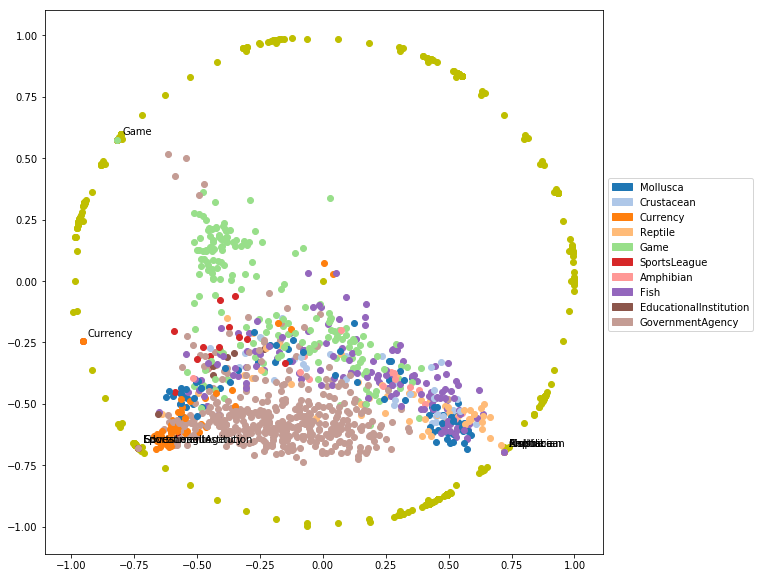

In [42]:

plt.figure(figsize=(10,10))

invention_classes = list(set(Y_invention))
color_map = {cla: col for cla, col in zip(invention_classes, colors)}

patchList = []
for key in invention_classes:
    data_key = mpatches.Patch(color=color_map[key], label=key)
    patchList.append(data_key)

for l, p in hyperbolic_embedding.items():
    plt.scatter(p[0], p[1], c = 'y')
    if l in invention_classes:
        plt.scatter(p[0], p[1], c = 'r')
        plt.text(p[0] + 0.02, p[1] + 0.02, l)

class_plot = [hyperbolic_embedding[c] for c in invention_classes]
        
for i, c in enumerate(class_plot):
    plt.scatter(c[0], c[1], color = color_map[invention_classes[i]])

plt.legend(handles=patchList, bbox_to_anchor=(1, 0.7))

n = 1000

pred = mixed_model.predict(X_invention[:n])[1]

mms = 0
fhs = 0
min_p = 0
for i, c in enumerate(pred):
    plt.scatter(c[0], c[1], color = color_map[Y_invention[i]])
    
    div = round(i/n , 2)
    
    if div != min_p:
        min_p = div
        clear_output()
        print('{}%'.format(int(min_p*100)))


### Compute Centroids of different models

In [49]:
pred = mixed_model.predict(X_invention)[1]

pred_dict = {c:[] for c in invention_classes}
for i, p in enumerate(pred):
#     if norm(p) < 1:
        pred_dict[Y_invention[i]].append(p)

for c in invention_classes:
    centroids['double'][c] = midpoint(pred_dict[c])
    

pred = single_hyp_model.predict(X_invention)
pred_dict = {c:[] for c in invention_classes}
for i, p in enumerate(pred):
#     if norm(p) < 1:
        pred_dict[Y_invention[i]].append(p)

for c in invention_classes:
    centroids['single'][c] = midpoint(pred_dict[c])
    
pred = hyp_regr.predict(X_invention)
pred_dict = {c:[] for c in invention_classes}
for i, p in enumerate(pred):
#     if norm(p) < 1:
        pred_dict[Y_invention[i]].append(p)

for c in invention_classes:
    centroids['rfr'][c] = midpoint(pred_dict[c])


### Plot centroids of each class, of each model

In [51]:
patchList = []

color, model = ['black', 'red', 'green'], ['single', 'double','rfr']

for c, m in zip(color, model):
    data_key = mpatches.Patch(color=c, label=m)
    patchList.append(data_key)

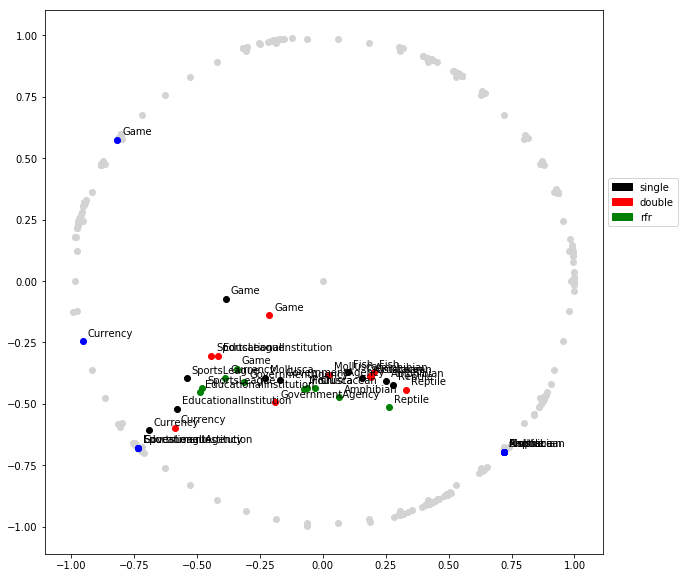

In [52]:
plt.figure(figsize=(10,10))

patchList = []

color, model = ['black', 'red', 'green'], ['single', 'double','rfr']

for c, m in zip(color, model):
    data_key = mpatches.Patch(color=c, label=m)
    patchList.append(data_key)

plt.legend(handles=patchList, bbox_to_anchor=(1, 0.7))    

for l, p in zip(hyperbolic_embedding.keys(), hyperbolic_embedding.values()):
    plt.scatter(p[0], p[1], c = '#d3d3d3')
    if l in invention_classes:
#         plt.scatter(p[0], p[1], c = color_map[l])
        plt.text(p[0] + 0.02, p[1] + 0.02, l)

class_plot = [hyperbolic_embedding[c] for c in invention_classes]
        
for i, c in enumerate(class_plot):
    plt.scatter(c[0], c[1], color = 'b')

for k,v in zip(centroids['double'].keys(), centroids['double'].values()):
    if not np.isnan(v[0]):
        plt.scatter(v[0], v[1], color = 'r')
        plt.text(v[0] + 0.02, v[1] + 0.02, k)


for k,v in zip(centroids['rfr'].keys(), centroids['rfr'].values()):
    if not np.isnan(v[0]):
        plt.scatter(v[0], v[1], color = 'g')
        plt.text(v[0] + 0.02, v[1] + 0.02, k)
        

for k,v in zip(centroids['single'].keys(), centroids['single'].values()):
    if not np.isnan(v[0]):
        plt.scatter(v[0], v[1], color = 'k')
        plt.text(v[0] + 0.02, v[1] + 0.02, k)
    

## Quality Pred

### Go in Import_Elmo_Embeddings (go down) to see the retrieving

In [53]:
quality_labels = load_data_with_pickle('/datahdd/vmanuel/datasets/invention_datasets/17_classes/quality_labels')
quality_vectors = load_data_with_pickle('/datahdd/vmanuel/datasets/invention_datasets/17_classes/quality_vectors')

In [54]:
hypred = mixed_model.predict(quality_vectors)[1]
dispred = mixed_model.predict(quality_vectors)[0]

In [55]:
occ = Counter(quality_labels)

In [56]:
occ

Counter({'alchemy': 17, 'beaver': 194, 'jpeg': 29, 'algae': 112})

In [57]:
quality_map = {'alchemy': 'g',
               'beaver': 'k',
               'jpeg': 'b',
               'algae': 'y'}

In [58]:
m_beaver = midpoint(hypred[17:211])
m_alchemy = midpoint(hypred[0:17])
m_jpeg = midpoint(hypred[211:240])
m_algae = midpoint(hypred[240:342])

(-1, 1)

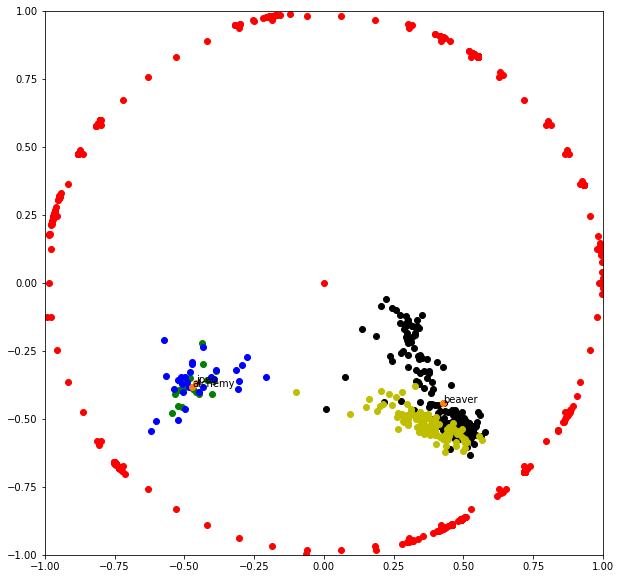

In [59]:
plt.figure(figsize=(10, 10))
for i, p in enumerate(hypred):
    plt.scatter(p[0], p[1], c = quality_map[quality_labels[i]])
    
for p in hyperbolic_embedding.values():
    plt.scatter(p[0], p[1], c = 'r')
    
plt.scatter(m_alchemy[0], m_alchemy[1], c='tab:orange')
plt.text(m_alchemy[0], m_alchemy[1], s='alchemy')

plt.scatter(m_beaver[0], m_beaver[1], c='tab:orange')
plt.text(m_beaver[0], m_beaver[1], s='beaver')

plt.scatter(m_jpeg[0], m_jpeg[1], c='tab:orange')
plt.text(m_jpeg[0], m_jpeg[1], s='jpeg')

plt.xlim(-1, 1)
plt.ylim(-1, 1)

In [60]:
tensors = [v for v in hyperbolic_embedding.values()]
hyper_neigh = find_neighbours(vector=m_algae,
                                 model=hyperbolic_embedding, 
                                 mode='hyper',
                                 topn=10,
                                 tensors=tensors)


KeyError: 'model'

In [61]:
hyper_neigh

NameError: name 'hyper_neigh' is not defined

In [821]:
hyper_distance(m, hyperbolic_embedding['Mammal'])

15.683540828289171

In [268]:
# c_alcohol = sum(dispred[:437])/437
# c_beaver = sum(dispred[437:437+ 194])/194
# c_jpeg = sum(dispred[437+194:437+194+29])/29
c_algae = sum(dispred[len(hypred)-113: len(hypred)])/112

In [269]:
hyper_neigh = find_neighbours(vector=c_algae,
                                 model=type_embedding, 
                                 mode='t2v',
                                 topn=10,
                              tensors =0
                             )
hyper_neigh

([0.9994035959243774,
  0.6316008567810059,
  0.629362940788269,
  0.617064893245697,
  0.6126998662948608,
  0.5938873291015625,
  0.590526819229126,
  0.5645953416824341,
  0.5510637760162354,
  0.5443531274795532],
 ['Plant',
  'Conifer',
  'Fern',
  'Insect',
  'FloweringPlant',
  'Species',
  'Fungus',
  'Bird',
  'CultivatedVariety',
  'Cycad'])